<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


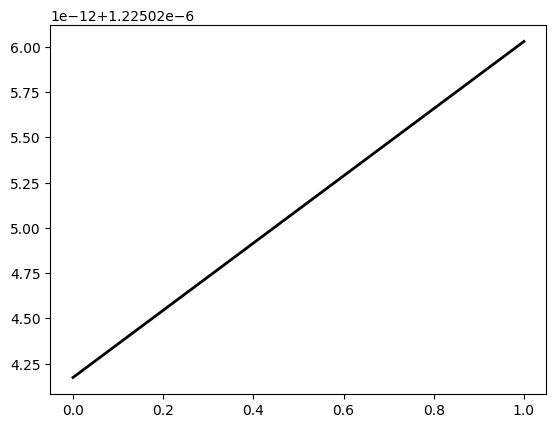

In [13]:
# Remove rows with missing values
data = df['ConvertedComp'].dropna()  

# Add a density curve
from scipy.stats import norm
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Fit')



Plot the histogram for the column `ConvertedComp`.


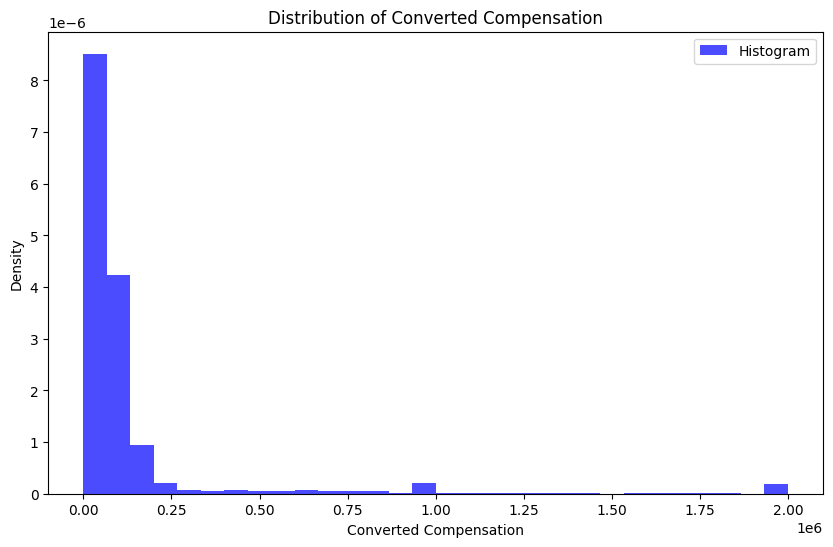

In [14]:
# Create a histogram with a density curve
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, color='blue', label='Histogram')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')

plt.legend()
plt.show()

What is the median of the column `ConvertedComp`?


In [15]:
df['ConvertedComp'].median()


57745.0

In [16]:
# What is the median Age of survey respondents?
df['Age'].median()

29.0

How many responders identified themselves only as a **Man**?


In [18]:
df['Gender'].value_counts()


Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [20]:
women_df = df[df['Gender'] == 'Woman']

median_compensation_women = women_df['ConvertedComp'].median()
median_compensation_women

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [21]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


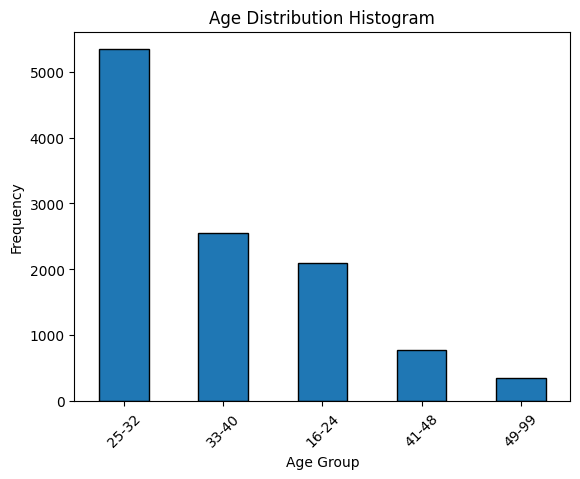

In [24]:
# Define the age bins
bins = [16, 24, 32, 40, 48, 99]

# Create labels for the age groups
labels = ['16-24', '25-32', '33-40', '41-48', '49-99']

# Use pd.cut to bin the 'Age' column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Count the occurrences of each age group
age_group_counts = df['Age Group'].value_counts()

# Create a bar plot for the age group counts
age_group_counts.plot(kind='bar', edgecolor='k')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


## Outliers


### Finding outliers


In [25]:
# What is the median ConvertedComp before removing any outliers?
df['ConvertedComp'].median()

57745.0

Find out if outliers exist in the column `ConvertedComp` using a box plot?


C:\Users\mrwoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


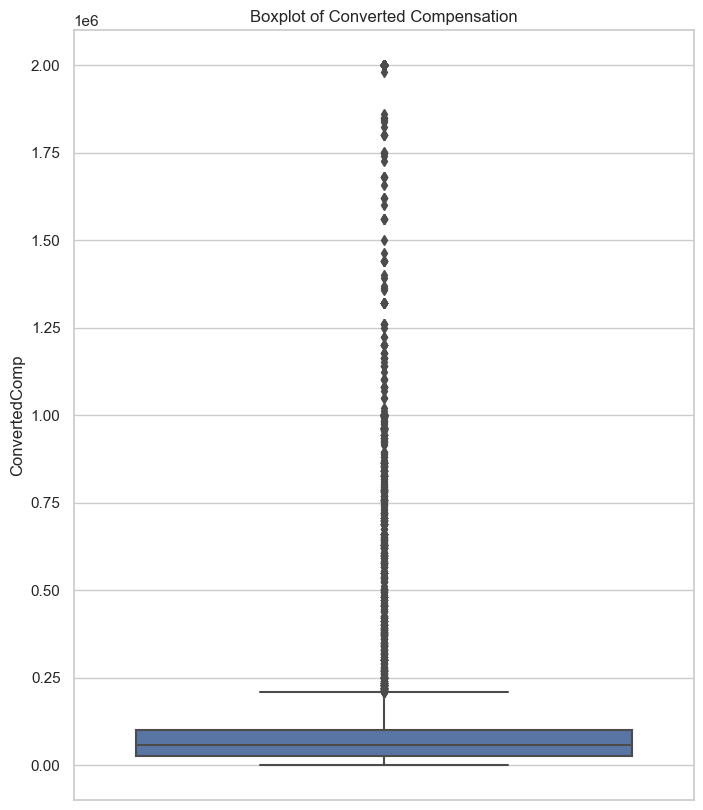

In [37]:
import seaborn as sns
sns.set(style="whitegrid")

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 10))
sns.boxplot(y='ConvertedComp', data=df, orient='h', width=0.8)
plt.title('Boxplot of Converted Compensation')

# Show the plot
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [38]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1
print("Interquartile Range (IQR) for ConvertedComp:", IQR)


Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [39]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound for ConvertedComp:", lower_bound)
print("Upper Bound for ConvertedComp:", upper_bound)



Lower Bound for ConvertedComp: -82830.0
Upper Bound for ConvertedComp: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [40]:
# Count outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Get the count of outliers
num_outliers = len(outliers)

# Print the number of outliers
print("Number of outliers in 'ConvertedComp':", num_outliers)


Number of outliers in 'ConvertedComp': 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [41]:
# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
df_no_outliers['ConvertedComp'].median()

52704.0

In [42]:
df_no_outliers['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [44]:
#Finding only the numeric columns
numeric_columns = df_no_outliers.select_dtypes(include='number')
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Get the correlation of 'Age' with all other numerical columns
age_correlation = correlation_matrix['Age'].drop('Age')
age_correlation


Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
